# Реализация нейронной сети для датасета Fashion MNIST с помощью библиотеки глубокого обучения Tensorflow.

Используется Категориальная кросс энтропия в качестве функции потерь, Adam как оптимизатор, количество скрытых слоев - 1, размер скрытого слоя составляет 128 нейронов, скорость обучения 0.01, количество эпох - 10, при этом размер батча составляет 64.

In [2]:
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical

# Загрузка данных MNIST
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# Преобразование изображений в одномерные векторы и нормализация значений
X_train = X_train.reshape((X_train.shape[0], -1)) / 255.0
X_test = X_test.reshape((X_test.shape[0], -1)) / 255.0

# Преобразование меток классов в one-hot формат
y_train_one_hot = to_categorical(y_train)
y_test_one_hot = to_categorical(y_test)

# Параметры сети
input_size = X_train.shape[1]
hidden_size = 128
output_size = 10
learning_rate = 0.01
num_epochs = 10
batch_size = 64

# Определение модели
model = models.Sequential()
model.add(layers.Dense(hidden_size, activation='relu', input_shape=(input_size,)))
model.add(layers.Dense(output_size, activation='softmax'))

# Компиляция модели
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=learning_rate),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Обучение модели
model.fit(X_train, y_train_one_hot, epochs=num_epochs, batch_size=batch_size, validation_split=0.2)

# Оценка модели на тестовых данных
loss, accuracy = model.evaluate(X_test, y_test_one_hot)
print(f'Test Loss: {loss}, Test Accuracy: {accuracy}')


11490434/11490434 [==============================] - 0s 0us/step
Epoch 1/10
750/750 [==============================] - 4s 5ms/step - loss: 0.2381 - accuracy: 0.9276 - val_loss: 0.1662 - val_accuracy: 0.9498
Epoch 2/10
750/750 [==============================] - 3s 4ms/step - loss: 0.1362 - accuracy: 0.9596 - val_loss: 0.1439 - val_accuracy: 0.9613
Epoch 3/10
750/750 [==============================] - 4s 6ms/step - loss: 0.1045 - accuracy: 0.9685 - val_loss: 0.1379 - val_accuracy: 0.9643
Epoch 4/10
750/750 [==============================] - 3s 4ms/step - loss: 0.1004 - accuracy: 0.9706 - val_loss: 0.1374 - val_accuracy: 0.9664
Epoch 5/10
750/750 [==============================] - 3s 4ms/step - loss: 0.0867 - accuracy: 0.9755 - val_loss: 0.1628 - val_accuracy: 0.9635
Epoch 6/10
750/750 [==============================] - 3s 4ms/step - loss: 0.0845 - accuracy: 0.9766 - val_loss: 0.1714 - val_accuracy: 0.9603
Epoch 7/10
750/750 [==============================] - 4s 5ms/step - loss: 0.0803 - 

Реализация без использования библиотеки глубокого обучения

In [6]:
import numpy as np
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical

# Метод реализации активационной функции relu
def relu(x):
    return np.maximum(0, x)

# Метод реализации активационной функции softmax
def softmax(x):
    exp_x = np.exp(x - np.max(x, axis=-1, keepdims=True))
    return exp_x / np.sum(exp_x, axis=-1, keepdims=True)

# Метод расчета кросс-энтропии
def cross_entropy_loss(predictions, targets):
    epsilon = 1e-15
    predictions = np.clip(predictions, epsilon, 1 - epsilon)
    N = predictions.shape[0]
    cross_entropy = -np.sum(targets * np.log(predictions + 1e-9)) / N
    return cross_entropy

# Метод реализации One-Hot Encoding
def one_hot_encode(labels, num_classes):
    num_samples = len(labels)
    one_hot_targets = np.zeros((num_samples, num_classes))
    one_hot_targets[np.arange(num_samples), labels] = 1
    return one_hot_targets

# Метод реализации обучения нейронной сети
def train_neural_network(X, y, hidden_size, output_size, learning_rate, num_epochs, batch_size):
    input_size = X.shape[1]
    num_samples = X.shape[0]

    # Инициализация весов
    weights_input_hidden = np.random.randn(input_size, hidden_size)
    biases_hidden = np.zeros((1, hidden_size))
    weights_hidden_output = np.random.randn(hidden_size, output_size)
    biases_output = np.zeros((1, output_size))

    for epoch in range(num_epochs):
        # Перемешивание данных
        indices = np.arange(num_samples)
        np.random.shuffle(indices)

        total_loss = 0
        correct_predictions = 0

        for batch_start in range(0, num_samples, batch_size):
            # Получение пачки данных
            batch_indices = indices[batch_start:batch_start + batch_size]
            X_batch = X[batch_indices]
            y_batch = y[batch_indices]

            # Прямой проход
            hidden_layer_input = np.dot(X_batch, weights_input_hidden) + biases_hidden
            hidden_layer_output = relu(hidden_layer_input)
            output_layer_input = np.dot(hidden_layer_output, weights_hidden_output) + biases_output
            output_layer_output = softmax(output_layer_input)

            # Расчет ошибки
            loss = cross_entropy_loss(output_layer_output, y_batch)
            total_loss += loss

            # Расчет accuracy
            predictions = np.argmax(output_layer_output, axis=1)
            true_labels = np.argmax(y_batch, axis=1)
            correct_predictions += np.sum(predictions == true_labels)

            # Обратный проход (обновление весов)
            output_error = output_layer_output - y_batch
            hidden_error = np.dot(output_error, weights_hidden_output.T) * (hidden_layer_output > 0)

            weights_hidden_output -= learning_rate * np.dot(hidden_layer_output.T, output_error)
            biases_output -= learning_rate * np.sum(output_error, axis=0, keepdims=True)
            weights_input_hidden -= learning_rate * np.dot(X_batch.T, hidden_error)
            biases_hidden -= learning_rate * np.sum(hidden_error, axis=0, keepdims=True)

        average_loss = total_loss / (num_samples / batch_size)
        accuracy = correct_predictions / num_samples

        print(f"Epoch {epoch+1}/{num_epochs}, Loss: {average_loss:.4f}, Accuracy: {accuracy:.4f}")

    return weights_input_hidden, biases_hidden, weights_hidden_output, biases_output

# Загрузка данных MNIST
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# Преобразование изображений в одномерные векторы и нормализация значений
X_train = X_train.reshape((X_train.shape[0], -1)) / 255.0
X_test = X_test.reshape((X_test.shape[0], -1)) / 255.0

# Преобразование меток классов в One-Hot Encoding формат
y_train_one_hot = to_categorical(y_train)
y_test_one_hot = to_categorical(y_test)

# Параметры нейронной сети
hidden_size = 300
output_size = 10
learning_rate = 0.1
num_epochs = 20
min_batch_size = 8
max_batch_size = 64

# Обучение сети с разными размерами пачек данных
for batch_size in range(min_batch_size, max_batch_size + 1, 8):
    print(f"\nTraining with batch size {batch_size}\n{'=' * 40}")
    train_neural_network(X_train, y_train_one_hot, hidden_size, output_size, learning_rate, num_epochs, batch_size)


Training with batch size 8
Epoch 1/20, Loss: 1.6462, Accuracy: 0.4607
Epoch 2/20, Loss: 1.3368, Accuracy: 0.5543
Epoch 3/20, Loss: 1.2672, Accuracy: 0.5772
Epoch 4/20, Loss: 1.2077, Accuracy: 0.5981
Epoch 5/20, Loss: 1.1507, Accuracy: 0.6127
Epoch 6/20, Loss: 1.1072, Accuracy: 0.6264
Epoch 7/20, Loss: 1.2225, Accuracy: 0.5745
Epoch 8/20, Loss: 1.1953, Accuracy: 0.5814
Epoch 9/20, Loss: 1.1339, Accuracy: 0.6188
Epoch 10/20, Loss: 1.1035, Accuracy: 0.6186
Epoch 11/20, Loss: 1.0960, Accuracy: 0.6184
Epoch 12/20, Loss: 1.1645, Accuracy: 0.5935
Epoch 13/20, Loss: 1.2150, Accuracy: 0.5653
Epoch 14/20, Loss: 1.1352, Accuracy: 0.5996
Epoch 15/20, Loss: 1.0154, Accuracy: 0.6514
Epoch 16/20, Loss: 1.0707, Accuracy: 0.6159
Epoch 17/20, Loss: 1.1803, Accuracy: 0.5749
Epoch 18/20, Loss: 1.1687, Accuracy: 0.5787
Epoch 19/20, Loss: 1.1032, Accuracy: 0.6062
Epoch 20/20, Loss: 1.0839, Accuracy: 0.6090

Training with batch size 16
Epoch 1/20, Loss: 1.8375, Accuracy: 0.3700
Epoch 2/20, Loss: 1.5782, Acc

Реализация с визуализацией изображений датасета (тренировочный и нестовый наборы)

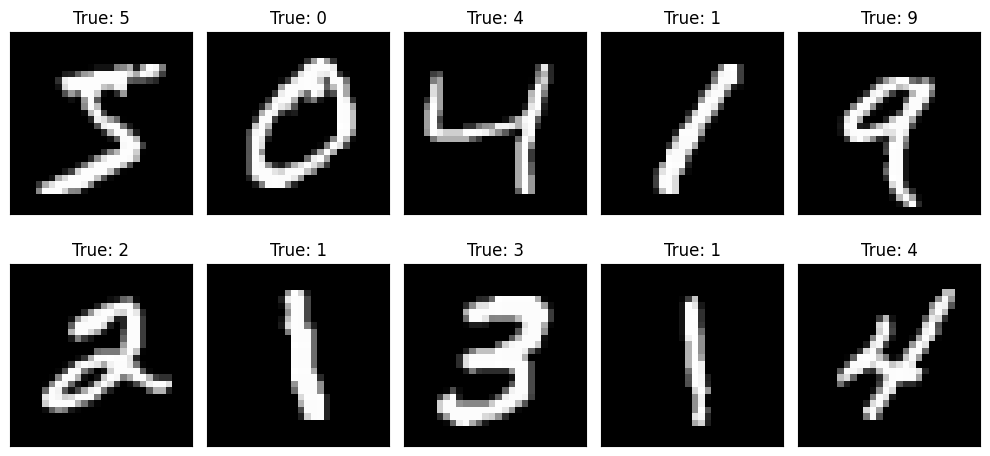


Training with batch size 64
Epoch 1/20, Loss: 2.4906, Accuracy: 0.1347
Epoch 2/20, Loss: 2.3111, Accuracy: 0.1159
Epoch 3/20, Loss: 2.3353, Accuracy: 0.1043
Epoch 4/20, Loss: 2.3243, Accuracy: 0.1109
Epoch 5/20, Loss: 2.3216, Accuracy: 0.1089
Epoch 6/20, Loss: 2.3251, Accuracy: 0.1071
Epoch 7/20, Loss: 2.3002, Accuracy: 0.1171
Epoch 8/20, Loss: 2.2894, Accuracy: 0.1220
Epoch 9/20, Loss: 2.3134, Accuracy: 0.1096
Epoch 10/20, Loss: 2.3366, Accuracy: 0.1028
Epoch 11/20, Loss: 2.3347, Accuracy: 0.1030
Epoch 12/20, Loss: 2.3364, Accuracy: 0.1013
Epoch 13/20, Loss: 2.3363, Accuracy: 0.1041
Epoch 14/20, Loss: 2.3373, Accuracy: 0.1016
Epoch 15/20, Loss: 2.3359, Accuracy: 0.1003
Epoch 16/20, Loss: 2.3348, Accuracy: 0.1019
Epoch 17/20, Loss: 2.3356, Accuracy: 0.1033
Epoch 18/20, Loss: 2.3363, Accuracy: 0.1033
Epoch 19/20, Loss: 2.3365, Accuracy: 0.1011
Epoch 20/20, Loss: 2.3371, Accuracy: 0.1013


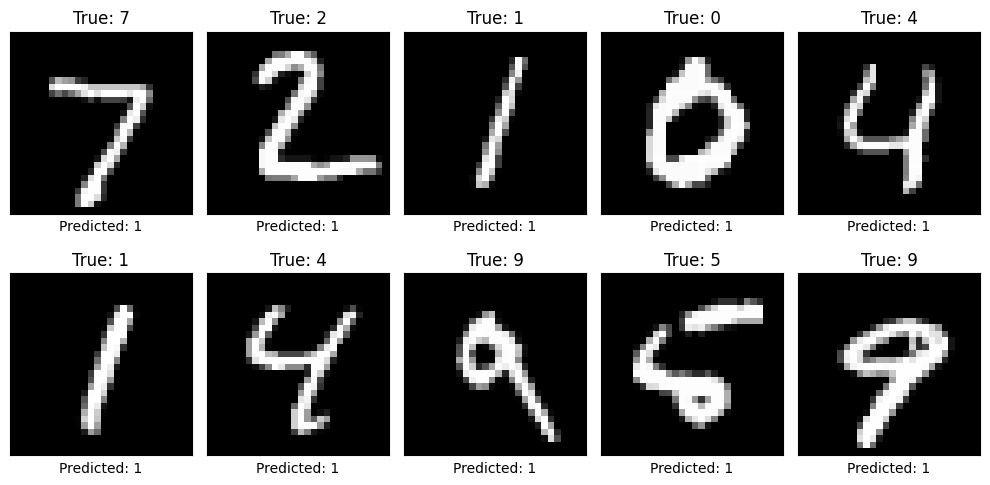

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical

# Функции relu, softmax, cross_entropy_loss, one_hot_encode оставим без изменений

# Функция для визуализации изображений
def visualize_images(images, labels, predictions=None):
    plt.figure(figsize=(10, 5))

    for i in range(10):
        plt.subplot(2, 5, i + 1)
        plt.imshow(images[i].reshape(28, 28), cmap='gray')
        plt.title(f"True: {labels[i]}")
        if predictions is not None:
            plt.xlabel(f"Predicted: {np.argmax(predictions[i])}")

        plt.xticks([])
        plt.yticks([])

    plt.tight_layout()
    plt.show()

# Загрузка данных MNIST
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# Преобразование изображений в одномерные векторы и нормализация значений
X_train = X_train.reshape((X_train.shape[0], -1)) / 255.0
X_test = X_test.reshape((X_test.shape[0], -1)) / 255.0

# Преобразование меток классов в one-hot формат
y_train_one_hot = to_categorical(y_train)
y_test_one_hot = to_categorical(y_test)

# Визуализация первых 10 изображений из тренировочного датасета
visualize_images(X_train, y_train)

# Параметры сети
hidden_size = 300
output_size = 10
learning_rate = 0.1
num_epochs = 20
min_batch_size = 8
max_batch_size = 64

# Обучение сети с разными размерами пачек данных
for batch_size in range(min_batch_size, max_batch_size + 1, 8):
    print(f"\nTraining with batch size {batch_size}\n{'=' * 40}")
    weights_input_hidden, biases_hidden, weights_hidden_output, biases_output = train_neural_network(
        X_train, y_train_one_hot, hidden_size, output_size, learning_rate, num_epochs, batch_size
    )

    # Визуализация предсказаний для первых 10 изображений из тестового датасета
    predictions = softmax(
        np.dot(relu(np.dot(X_test, weights_input_hidden) + biases_hidden), weights_hidden_output) + biases_output
    )
    visualize_images(X_test, y_test, predictions)


Самая удачная реализация с оптимальными гиперпараметрами

In [7]:
import numpy as np
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical

# Метод реализации активационной функции relu
def relu(x):
    return np.maximum(0, x)

# Метод реализации активационной функции softmax
def softmax(x):
    exp_x = np.exp(x - np.max(x, axis=-1, keepdims=True))
    return exp_x / np.sum(exp_x, axis=-1, keepdims=True)

# Метод расчета кросс-энтропии
def cross_entropy_loss(predictions, targets):
    epsilon = 1e-15
    predictions = np.clip(predictions, epsilon, 1 - epsilon)
    N = predictions.shape[0]
    cross_entropy = -np.sum(targets * np.log(predictions + 1e-9)) / N
    return cross_entropy

# Метод реализации One-Hot Encoding
def one_hot_encode(labels, num_classes):
    num_samples = len(labels)
    one_hot_targets = np.zeros((num_samples, num_classes))
    one_hot_targets[np.arange(num_samples), labels] = 1
    return one_hot_targets

# Метод реализации обучения нейронной сети
def train_neural_network(X, y, hidden_size, output_size, learning_rate, num_epochs, batch_size):
    input_size = X.shape[1]
    num_samples = X.shape[0]

    # Инициализация весов
    weights_input_hidden = np.random.randn(input_size, hidden_size)
    biases_hidden = np.zeros((1, hidden_size))
    weights_hidden_output = np.random.randn(hidden_size, output_size)
    biases_output = np.zeros((1, output_size))

    for epoch in range(num_epochs):
        # Перемешивание данных
        indices = np.arange(num_samples)
        np.random.shuffle(indices)

        total_loss = 0
        correct_predictions = 0

        for batch_start in range(0, num_samples, batch_size):
            # Получение пачки данных
            batch_indices = indices[batch_start:batch_start + batch_size]
            X_batch = X[batch_indices]
            y_batch = y[batch_indices]

            # Прямой проход
            hidden_layer_input = np.dot(X_batch, weights_input_hidden) + biases_hidden
            hidden_layer_output = relu(hidden_layer_input)
            output_layer_input = np.dot(hidden_layer_output, weights_hidden_output) + biases_output
            output_layer_output = softmax(output_layer_input)

            # Расчет ошибки
            loss = cross_entropy_loss(output_layer_output, y_batch)
            total_loss += loss

            # Расчет accuracy
            predictions = np.argmax(output_layer_output, axis=1)
            true_labels = np.argmax(y_batch, axis=1)
            correct_predictions += np.sum(predictions == true_labels)

            # Обратный проход (обновление весов)
            output_error = output_layer_output - y_batch
            hidden_error = np.dot(output_error, weights_hidden_output.T) * (hidden_layer_output > 0)

            weights_hidden_output -= learning_rate * np.dot(hidden_layer_output.T, output_error)
            biases_output -= learning_rate * np.sum(output_error, axis=0, keepdims=True)
            weights_input_hidden -= learning_rate * np.dot(X_batch.T, hidden_error)
            biases_hidden -= learning_rate * np.sum(hidden_error, axis=0, keepdims=True)

        average_loss = total_loss / (num_samples / batch_size)
        accuracy = correct_predictions / num_samples

        print(f"Epoch {epoch+1}/{num_epochs}, Loss: {average_loss:.4f}, Accuracy: {accuracy:.4f}")

    return weights_input_hidden, biases_hidden, weights_hidden_output, biases_output

# Загрузка данных MNIST
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# Преобразование изображений в одномерные векторы и нормализация значений
X_train = X_train.reshape((X_train.shape[0], -1)) / 255.0
X_test = X_test.reshape((X_test.shape[0], -1)) / 255.0

# Преобразование меток классов в One-Hot Encoding формат
y_train_one_hot = to_categorical(y_train)
y_test_one_hot = to_categorical(y_test)

# Параметры нейронной сети
hidden_size = 128
output_size = 10
learning_rate = 0.01
num_epochs = 10
min_batch_size = 64
max_batch_size = 64


# Обучение сети с разными размерами пачек данных
for batch_size in range(min_batch_size, max_batch_size + 1, 8):
    print(f"\nTraining with batch size {batch_size}\n{'=' * 40}")
    train_neural_network(X_train, y_train_one_hot, hidden_size, output_size, learning_rate, num_epochs, batch_size)


Training with batch size 64
Epoch 1/10, Loss: 1.0450, Accuracy: 0.7519
Epoch 2/10, Loss: 0.4585, Accuracy: 0.8744
Epoch 3/10, Loss: 0.3485, Accuracy: 0.9050
Epoch 4/10, Loss: 0.2981, Accuracy: 0.9183
Epoch 5/10, Loss: 0.2637, Accuracy: 0.9268
Epoch 6/10, Loss: 0.2382, Accuracy: 0.9333
Epoch 7/10, Loss: 0.2194, Accuracy: 0.9389
Epoch 8/10, Loss: 0.2012, Accuracy: 0.9437
Epoch 9/10, Loss: 0.1913, Accuracy: 0.9455
Epoch 10/10, Loss: 0.1827, Accuracy: 0.9484


Финальная реализация с контрольным набором параметров:

Размер пачки может меняться от 8 до 64 изображений (в зависимости от доступного объема памяти).
* Скорость обучения - 0.1.
* Количество скрытых нейронов – 300.
* Количество эпох – 20.

In [ ]:
import numpy as np
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical

# Метод реализации активационной функции relu
def relu(x):
    return np.maximum(0, x)

# Метод реализации активационной функции softmax
def softmax(x):
    exp_x = np.exp(x - np.max(x, axis=-1, keepdims=True))
    return exp_x / np.sum(exp_x, axis=-1, keepdims=True)

# Метод расчета кросс-энтропии
def cross_entropy_loss(predictions, targets):
    epsilon = 1e-15
    predictions = np.clip(predictions, epsilon, 1 - epsilon)
    N = predictions.shape[0]
    cross_entropy = -np.sum(targets * np.log(predictions + 1e-9)) / N
    return cross_entropy

# Метод реализации One-Hot Encoding
def one_hot_encode(labels, num_classes):
    num_samples = len(labels)
    one_hot_targets = np.zeros((num_samples, num_classes))
    one_hot_targets[np.arange(num_samples), labels] = 1
    return one_hot_targets

# Метод реализации обучения нейронной сети
def train_neural_network(X, y, hidden_size, output_size, learning_rate, num_epochs, batch_size):
    input_size = X.shape[1]
    num_samples = X.shape[0]

    # Инициализация весов
    weights_input_hidden = np.random.randn(input_size, hidden_size)
    biases_hidden = np.zeros((1, hidden_size))
    weights_hidden_output = np.random.randn(hidden_size, output_size)
    biases_output = np.zeros((1, output_size))

    for epoch in range(num_epochs):
        # Перемешивание данных
        indices = np.arange(num_samples)
        np.random.shuffle(indices)

        total_loss = 0
        correct_predictions = 0

        for batch_start in range(0, num_samples, batch_size):
            # Получение пачки данных
            batch_indices = indices[batch_start:batch_start + batch_size]
            X_batch = X[batch_indices]
            y_batch = y[batch_indices]

            # Прямой проход
            hidden_layer_input = np.dot(X_batch, weights_input_hidden) + biases_hidden
            hidden_layer_output = relu(hidden_layer_input)
            output_layer_input = np.dot(hidden_layer_output, weights_hidden_output) + biases_output
            output_layer_output = softmax(output_layer_input)

            # Расчет ошибки
            loss = cross_entropy_loss(output_layer_output, y_batch)
            total_loss += loss

            # Расчет accuracy
            predictions = np.argmax(output_layer_output, axis=1)
            true_labels = np.argmax(y_batch, axis=1)
            correct_predictions += np.sum(predictions == true_labels)

            # Обратный проход (обновление весов)
            output_error = output_layer_output - y_batch
            hidden_error = np.dot(output_error, weights_hidden_output.T) * (hidden_layer_output > 0)

            weights_hidden_output -= learning_rate * np.dot(hidden_layer_output.T, output_error)
            biases_output -= learning_rate * np.sum(output_error, axis=0, keepdims=True)
            weights_input_hidden -= learning_rate * np.dot(X_batch.T, hidden_error)
            biases_hidden -= learning_rate * np.sum(hidden_error, axis=0, keepdims=True)

        average_loss = total_loss / (num_samples / batch_size)
        accuracy = correct_predictions / num_samples

        print(f"Epoch {epoch+1}/{num_epochs}, Loss: {average_loss:.4f}, Accuracy: {accuracy:.4f}")

    return weights_input_hidden, biases_hidden, weights_hidden_output, biases_output

# Загрузка данных MNIST
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# Преобразование изображений в одномерные векторы и нормализация значений
X_train = X_train.reshape((X_train.shape[0], -1)) / 255.0
X_test = X_test.reshape((X_test.shape[0], -1)) / 255.0

# Преобразование меток классов в One-Hot Encoding формат
y_train_one_hot = to_categorical(y_train)
y_test_one_hot = to_categorical(y_test)

# Параметры нейронной сети
hidden_size = 300
output_size = 10
learning_rate = 0.1
num_epochs = 20
min_batch_size = 8
max_batch_size = 64


# Обучение сети с разными размерами пачек данных
for batch_size in range(min_batch_size, max_batch_size + 1, 8):
    print(f"\nTraining with batch size {batch_size}\n{'=' * 40}")
    train_neural_network(X_train, y_train_one_hot, hidden_size, output_size, learning_rate, num_epochs, batch_size)